In [1]:
import numpy as np # imports numpy module and adopts np shorthand
from matplotlib import pyplot 
import sympy as sp

## Creating a direction field with NumPy and MatPlotLib

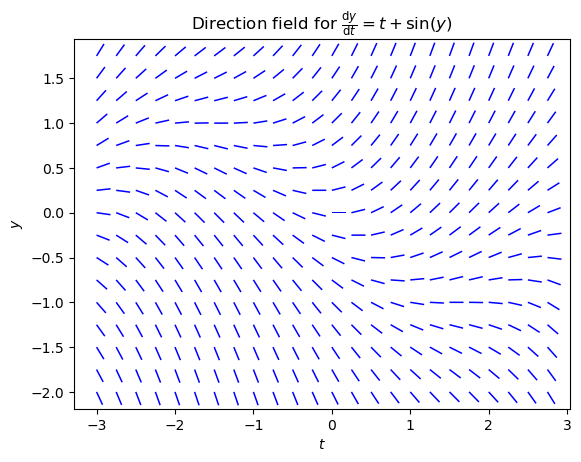

In [26]:
# set step sizes for y and t
ht, hy = 0.25, 0.25;
# set bounds for t- and y-intervals
tmin, tmax = -3, 3;
ymin, ymax = -2, 2;
# sample t- and y-intervals at appropriate step sizes
tvals = np.arange(tmin, tmax, ht);
yvals = np.arange(ymin, ymax, hy);
# create rectangle mesh in ty-plane; data for each variable is stored in a separate rectangle array
T, Y = np.meshgrid(tvals, yvals);
dt = np.ones(T.shape); # create a dt=1 at each point of the 2D mesh
dy = Y + np.sin(T);    # sample dy =(dy/dt)*dt, where dt=1 at each point of the 2D mesh
# normalize each vector <dt, dy> so that it has "unit" length
[dt, dy] = [dt, dy]/np.sqrt(dt**2 + dy**2);
# plot "vector field" without arrowheads
dfield = pyplot.figure();
dplot = pyplot.quiver(T, Y, dt, dy, color="b", headlength=0, headwidth=1);
pyplot.title(r"Direction field for $\frac{\mathrm{d}y}{\mathrm{d}t} = t+\sin(y)$");
pyplot.xlabel("$t$");
pyplot.ylabel("$y$");

## Symbolic solutions with SymPy

Eq(y(t), C1*exp(t) - sin(t)/2 - cos(t)/2)

Eq(y(t), -sin(t)/2 - cos(t)/2)

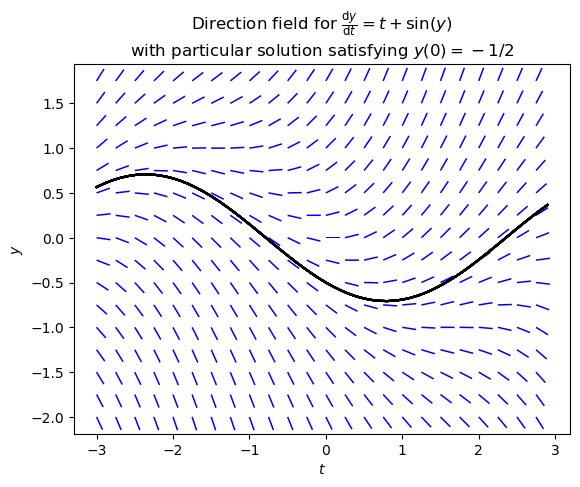

In [39]:
t = sp.Symbol('t');
y = sp.Function('y');
ode = sp.Eq(y(t).diff(t), sp.sin(t)+y(t));
gsoln=sp.dsolve(ode, y(t)); 
display(gsoln)
psoln=sp.dsolve(ode, ics={y(0): -1/2}); 
display(psoln);
#sp.plot(psoln.rhs, (t,-3,3), ylabel="$y$", xlabel="$t$"); sympy plots look bad!!!
# or lambdify the solution and use matplotlib directly, 
# but will likely need to sample t-interval more finely for a smooth plot
yfunc=sp.lambdify(t, psoln.rhs, modules=['numpy'])
ht = 0.1;
tvals = np.arange(tmin, tmax, ht);
pyplot.figure(dfield) # set the current figure to direction field created above
pyplot.plot(tvals, yfunc(tvals), color='k');
pyplot.title(r"Direction field for $\frac{\mathrm{d}y}{\mathrm{d}t} = t + \sin(y)$" 
             "\n" r"with particular solution satisfying $y(0)=-1/2$");
pyplot.show()